In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cygnus_lib as cy

#f= open("guru99.txt","w+")
     #f=open("guru99.txt","a+")
#for i in range(10):
#    f.write(" %d\r\n" % (i+1))
#f.close()   
     #Open the file back and read the contents
#f=open("guru99.txt", "r")
#if f.mode == 'r': 
#          contents =f.read()
#print(contents)
     #or, readlines reads the individual line into a list
     #fl =f.readlines()
     #for x in fl:
     #print x
x = np.arange(0, 5, 0.1);
y = np.sin(x)
#plt.plot(x, y) 

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
   
def hist_channel(df,
                 channel=44 ):
    fig,ax = plt.subplots(ncols=2,nrows=2,figsize=(14,14))
    
    ax[0][0].hist(df[df.ch==channel]['amplitude_mV'],bins=np.linspace(-1000,-5.,70))
    ax[0][0].set_xlabel('Amplitude [mV]')
    ax[0][0].set_ylabel('Counts')
    #
     #  ax[1][0].hist(df[df.ch==channel]['charge_pC'],bins=np.linspace(-40,0,100))
     #  ax[1][0].set_xlabel('Charge [pC]')
     #  ax[1][0].set_ylabel('Counts')
    
     #  ax[0][1].hist(df['t_1_ns'],bins=np.linspace(0,350.,350))
     #  ax[0][1].set_xlabel('Time Left [ns]')
     #  ax[0][1].set_ylabel('Counts')

      # ax[1][1].hist(df['t_2_ns'],bins=np.linspace(0,350,350))
      # ax[1][1].set_xlabel('Time Right [ns]')
      # ax[1][1].set_ylabel('Counts')

    return fig,ax

def read_file(fname,max_number=200,
              header_length= 26):
    
    index_count     = 0
    index_new       = 0
    index_new_count = -1
    data_tot = []
    pos_to_be_read = [0,2,3,4,6,8]
    
    colnames_header = ['Energy','dE/dx elec.','dE/dx nucl.','Pr. Range','Long. Straggling','Lat. Straggling']
    colnames = []
    [colnames.append(colname_header) for colname_header in colnames_header]

   
    with open(fname,'rb') as f:
    # [f.readline() for i in range(header_length)]
     while True:
      lineH = f.readline().decode('utf-8')
    #  print(lineH)
      if lineH[45:46] == '-':
       break
     while index_count<max_number or max_number < 0:
            line = f.readline().decode('utf-8')
            if line[4:7] == '---':
                # either end of file or just a blank line.....
                # we'll assume EOF, because we don't have a choice with the while loop!
                break
            data_single = []
            splitted_line = line.split()
            #print(splitted_line)
            [data_single.append(float(splitted_line[p].replace(',','.'))) for p in pos_to_be_read]
            if splitted_line[1] == 'MeV':
                data_single[0] = data_single[0]*1000
            if splitted_line[5] == 'mm':
                data_single[3] = data_single[3]*1000    
            if splitted_line[7] == 'mm': 
                data_single[4] = data_single[4]*1000    
            if splitted_line[9] == 'mm': 
                data_single[5] = data_single[5]*1000    
            #print(data_single)     
            data_tot.append(data_single)
            index_count+=1
           

    f.close()
    print('Creating Data Frame ...                                    ',end='\r')

    df = pd.DataFrame(data_tot,columns=colnames)
 #   df['amplitude_mV'] = df['amplitude_V']*1000
  #  df['t_diff_ns'] = df['t_1_ns']-df['t_2_ns']
  #  tot_lentgh = len(df)
  #  id_to_drop = df[(df.ch==1) & (df.good==0)].id.values
  #  df = df[~df['id'].isin(id_to_drop)]
  #  final_length = len(df)
    print('Done!                                                      ',end='\r')
    #print('The percantage of good triggers is:',final_length/tot_lentgh*100.)
    return df



In [3]:
F_in_He = read_file("./data/SRIM/Fluorine in Helium (gas).txt")


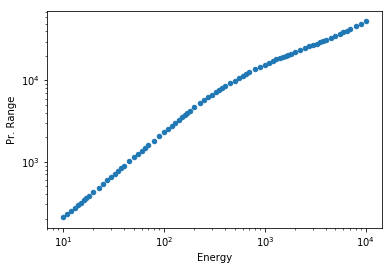

In [4]:
plot=F_in_He.plot.scatter(x='Energy',y='Pr. Range', logx='True', logy='True')


In [5]:
F_in_CF4 = read_file("./data/SRIM/Fluorine in Carbon Tetrafluoride (ICRU-370) (gas).txt")

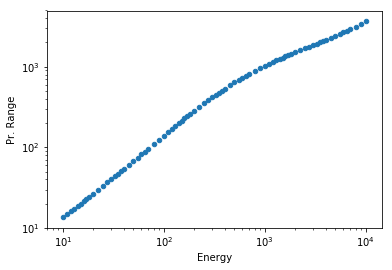

In [6]:
plot=F_in_CF4.plot.scatter(x='Energy',y='Pr. Range', logx='True', logy='True')

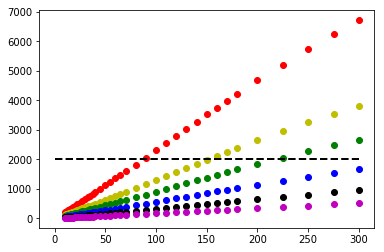

In [7]:
import matplotlib.pyplot as plt
Maxent = 40
range_He = F_in_He['Pr. Range'][:Maxent]
range_He
range_CF4 = F_in_CF4['Pr. Range'][:Maxent]
range_CF4
CF4_percent = [0.0,0.05,0.1,0.2,0.4,0.8]
CF4_percent_col = ['ro','yo','go','bo','ko','mo']
for p,c in zip(CF4_percent,CF4_percent_col):
 dfMix=p/range_CF4+(1.0-p)/range_He
 dfMix=1.0/dfMix
 plt.plot(F_in_CF4['Energy'][:Maxent],dfMix,c)
# plt.plot(dfCF4['Energy'],range_CF4,'ro')
# plt.plot(dfCF4['Energy'],range_He,'yo')
plt.plot([0.0, 300], [2000., 2000.], color='k', linestyle='--', linewidth=2)
plt.savefig('SRIM_Fluorine.jpg')


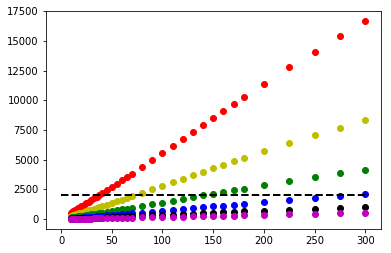

In [8]:
import matplotlib.pyplot as plt
Maxent = 40
range_He = F_in_He['Pr. Range'][:Maxent]
range_He
range_CF4 = F_in_CF4['Pr. Range'][:Maxent]
range_CF4
CF4_percent = [0.025,0.05,0.1,0.2,0.4,0.8]
# 0.05 -> 760 torr / 20 = 38 torr
CF4_percent_col = ['ro','yo','go','bo','ko','mo']
for p,c in zip(CF4_percent,CF4_percent_col):
 dfMix=p/range_CF4+(0.0)/range_He
 dfMix=1.0/dfMix
 plt.plot(F_in_CF4['Energy'][:Maxent],dfMix,c)
# plt.plot(dfCF4['Energy'],range_CF4,'ro')
# plt.plot(dfCF4['Energy'],range_He,'yo')
plt.plot([0.0, 300], [2000., 2000.], color='k', linestyle='--', linewidth=2)
plt.savefig('SRIM_Fluorine_noHe.jpg')


In [8]:
He_in_CF4 = read_file("./data/SRIM/Helium in Carbon Tetrafluoride (ICRU-370) (gas).txt")

In [9]:
He_in_He = read_file("./data/SRIM/Helium in Helium (gas).txt")

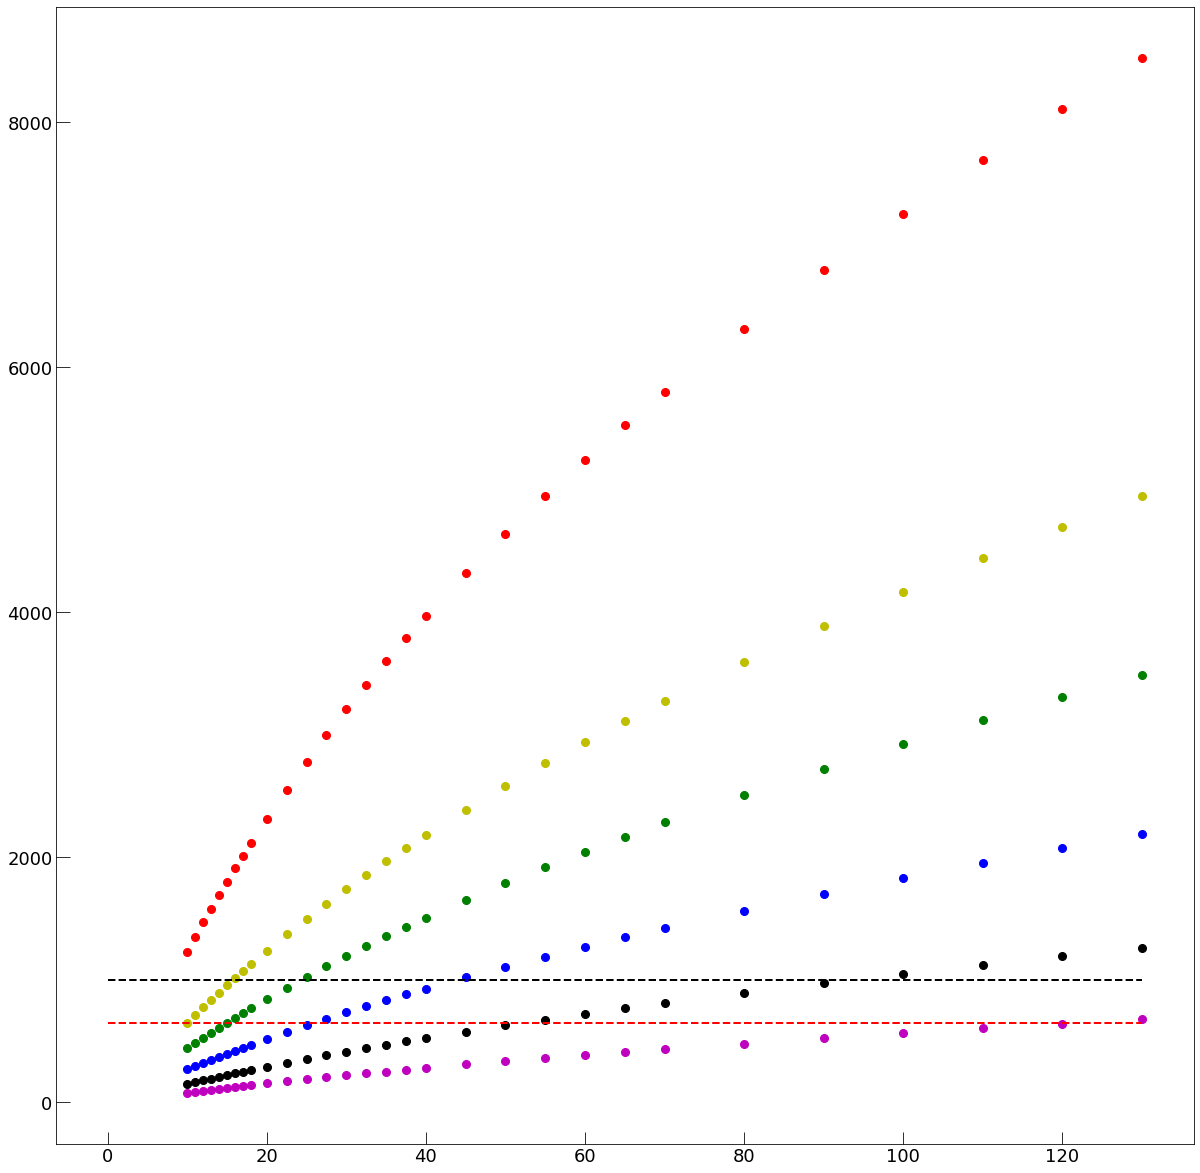

In [22]:
import matplotlib.pyplot as plt
cy.set_atlas_style('large')
Maxent = 30
range_He = He_in_He['Pr. Range'][:Maxent]
range_He
range_CF4 = He_in_CF4['Pr. Range'][:Maxent]
range_CF4
CF4_percent = [0.0,0.05,0.1,0.2,0.4,0.8]
CF4_percent_col = ['ro','yo','go','bo','ko','mo']
for p,c in zip(CF4_percent,CF4_percent_col):
 dfMix=p/range_CF4+(1.0-p)/range_He
 dfMix=1.0/dfMix
 plt.plot(F_in_CF4['Energy'][:Maxent],dfMix,c)
# plt.plot(dfCF4['Energy'],range_CF4,'ro')
# plt.plot(dfCF4['Energy'],range_He,'yo')
plt.plot([0.0, 130], [1000., 1000.], color='k', linestyle='--', linewidth=2)
plt.plot([0.0, 130], [650., 650.], color='r', linestyle='--', linewidth=2)
# range in mcron vs energia in kev
plt.savefig('SRIM_Helium.jpg')


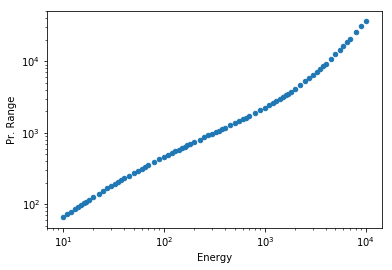

In [11]:
plot=He_in_CF4.plot.scatter(x='Energy',y='Pr. Range', logx='True', logy='True')